# Project : Youtube adview Prediction

## Context :
Youtube advertisers pay content creators based on adviews and clicks for the
goods and services being marketed. They want to estimate the adview based
on other metrics like comments, likes etc. The problem statement is therefore
to train various regression models and choose the best one to predict the
number of adviews. The data needs to be refined and cleaned before feeding
in the algorithms for better results.




## Objective
To build a machine learning regression to predict youtube adview count based
on other youtube metrics.

### Steps and Tasks
1. Import the datasets and libraries, check shape and datatype.
2. Visualise the dataset using plotting using heatmaps and plots. You
can study data distributions for each attribute as well.
3. Clean the dataset by removing missing values and other things.
4. Transform attributes into numerical values and other
necessary transformations
5. Normalise your data and split the data into training, validation and test
set in the appropriate ratio.
6. Use linear regression, Support Vector Regressor for training and get
errors.
7. Use Decision Tree Regressor and Random Forest Regressors.
8. Build an artificial neural network and train it with different layers
and hyperparameters. Experiment a little. Use keras.
9. Pick the best model based on error as well as
generalisation.
10.Save your model and predict on the test set.




## Import the datasets and libraries, check shape and datatype.

In [74]:
#  import the train data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/Intership Studio/Project/train.csv'
ytube_adv_df = pd.read_csv(path)

# check shape and datatype
print(ytube_adv_df.shape)
print(ytube_adv_df.dtypes)


(14999, 9)
vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


## Pre-processing the datasets

In [75]:

# check any null values present in the datasets
print(any(ytube_adv_df.duplicated()))

print(ytube_adv_df.isnull().sum())

False
vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64


In [76]:
# Assingn a number to the category feature

# ytube_adv_df['category'] = ytube_adv_df['category'].astype('category').cat.codes

category = {'A' : 1 , 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'H':8}

ytube_adv_df['category'] = ytube_adv_df['category'].map(category)

# to check the distinct category values
# print(ytube_adv_df['category'].unique())
ytube_adv_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [77]:
# Replacing Character "F" in the Datasets to 0
for i in ['views','likes','dislikes','comment']:
    ytube_adv_df[i] = ytube_adv_df[i].replace('F', 0)
ytube_adv_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [78]:
# convert views,likes,dislikes,and comment to integer

for i in ['views','likes','dislikes','comment']:
    # ytube_adv_df[i] = ytube_adv_df[i].astype(int)
    ytube_adv_df[i] = pd.to_numeric(ytube_adv_df[i], errors='coerce')


ytube_adv_df.dtypes


vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [79]:
# Encoding the Duration, view, vidid

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ytube_adv_df['duration'] = encoder.fit_transform(ytube_adv_df['duration'])
ytube_adv_df['vidid'] = encoder.fit_transform(ytube_adv_df['vidid'])
ytube_adv_df['published'] = encoder.fit_transform(ytube_adv_df['published'])
ytube_adv_df.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,6078,40,1031602,8523,363,1095,2170,2993,6
1,2869,2,1707,56,2,6,2187,3108,4
2,8339,1,2023,25,0,2,2096,1910,3
3,9215,6,620860,777,161,153,2121,2603,8
4,123,1,666,1,0,0,2093,2018,4


In [ ]:
# ytube_adv_df['duration'] = ytube_adv_df['duration'].astype('category').cat.codes
# ytube_adv_df['vidid'] = ytube_adv_df['vidid'].astype('category').cat.codes
# ytube_adv_df['published'] = ytube_adv_df['published'].astype('category').cat.codes
# ytube_adv_df.head()

In [80]:
# Converting the duration into seconds


def checki(x):
    # Remove the 'PT' prefix
    y = x[2:]

    # Initialize default values for hours, minutes, and seconds
    h, m, s = '00', '00', '00'

    # Temporary variable to collect digits
    mm = ''

    # Iterate through the string
    for i in y:
        if i.isdigit():
            mm += i
        else:
            if i == 'H':
                h = mm.zfill(2)  # Ensure two digits
            elif i == 'M':
                m = mm.zfill(2)  # Ensure two digits
            elif i == 'S':
                s = mm.zfill(2)  # Ensure two digits
            mm = ''  # Reset temporary variable

    # Return the formatted time string
    return f"{h}:{m}:{s}"

# Example usage
duration = pd.read_csv(path)['duration']
duration = duration.apply(checki)


def time_to_seconds(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

duration_sec = duration.apply(time_to_seconds)
ytube_adv_df['duration'] = duration_sec
ytube_adv_df.head()


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,6078,40,1031602,8523,363,1095,2170,457,6
1,2869,2,1707,56,2,6,2187,570,4
2,8339,1,2023,25,0,2,2096,136,3
3,9215,6,620860,777,161,153,2121,262,8
4,123,1,666,1,0,0,2093,31,4


In [81]:
# Remove videos with adview greater than 2000000 as outlier
ytube_adv_df = ytube_adv_df[ytube_adv_df["adview"] <2000000]
ytube_adv_df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,6078,40,1031602,8523,363,1095,2170,457,6
1,2869,2,1707,56,2,6,2187,570,4
2,8339,1,2023,25,0,2,2096,136,3
3,9215,6,620860,777,161,153,2121,262,8
4,123,1,666,1,0,0,2093,31,4


## Plot the Visualization

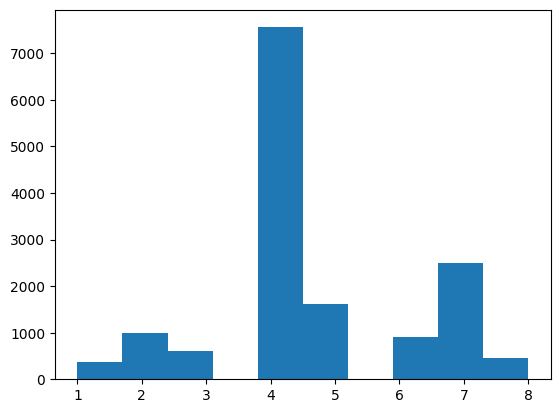

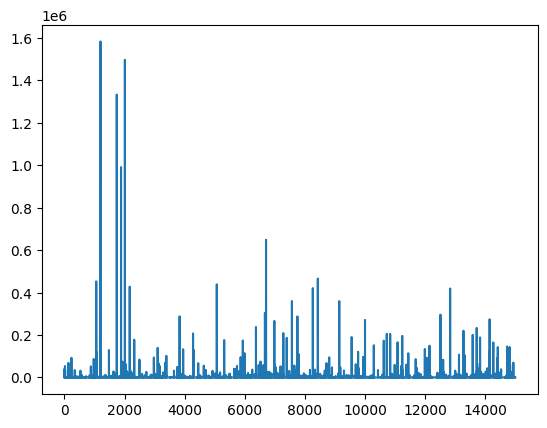

In [83]:
plt.hist(ytube_adv_df["category"])
plt.show()
plt.plot(ytube_adv_df["adview"])
plt.show()

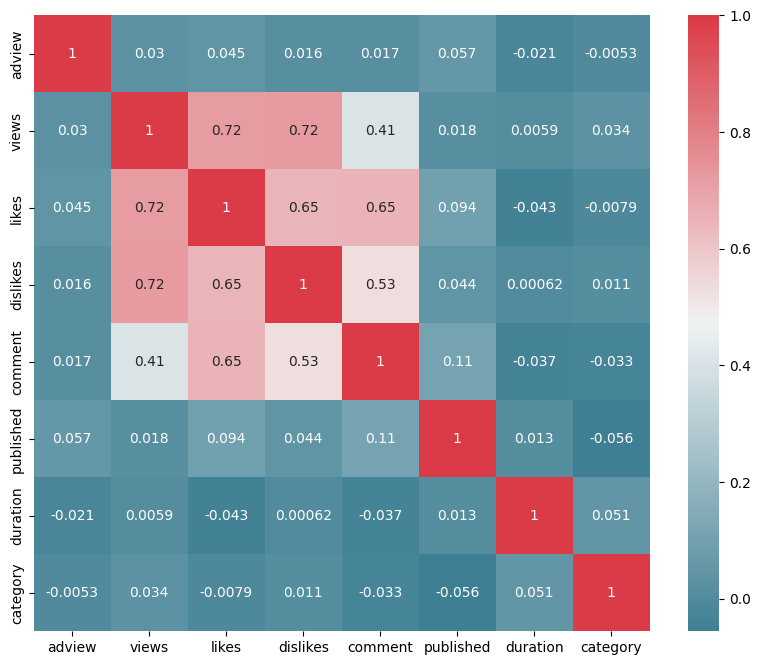

In [82]:
f, ax = plt.subplots(figsize=(10, 8))
corr = ytube_adv_df.drop('vidid', axis=1).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
square=True, ax=ax,annot=True)
plt.show()

## Training the datasets

In [93]:
# Normalize the datasets to MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(ytube_adv_df.drop(['adview'], axis=1))
y_train = ytube_adv_df['adview']


#  split the datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#
X_train.shape, X_test.shape



In [101]:
# Evaluate the metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_model(y_true, y_pred):
  print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
  print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
  print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))
  print("R2 Score:", r2_score(y_true, y_pred))
  # print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_true, y_pred))



In [102]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
evaluate_model(y_test, y_pred)

Mean Absolute Error: 3548.78620021698
Mean Squared Error: 877406453.6374165
Root Mean Squared Error: 29621.047477046057
R2 Score: 0.0029832810002812238


In [103]:
# Support Vector Regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
evaluate_model(y_test, y_pred)

Mean Absolute Error: 1644.5430031043256
Mean Squared Error: 882732242.1861843
Root Mean Squared Error: 29710.81019067276
R2 Score: -0.0030685325041279743


In [104]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
evaluate_model(y_test, y_pred)

Mean Absolute Error: 1924.0393333333334
Mean Squared Error: 540705124.8
Root Mean Squared Error: 23253.066997710215
R2 Score: 0.38558458598116674


In [115]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)
evaluate_model(y_test, y_pred)




Mean Absolute Error: 2435.770729436532
Mean Squared Error: 773948086.2050208
Root Mean Squared Error: 27819.922469428646
R2 Score: 0.1205453545670897


In [118]:
# Artificial Neural Network
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()

y_pred = ann.predict(X_test)
evaluate_model(y_test, y_pred)

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 756966656.0000 - mean_squared_error: 756966656.0000
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 756960512.0000 - mean_squared_error: 756960512.0000
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 756940608.0000 - mean_squared_error: 756940608.0000
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 756902912.0000 - mean_squared_error: 756902912.0000
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 756846592.0000 - mean_squared_error: 756846592.0000
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 756768704.0000 - mean_squared_error: 756768704.0000
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 756671616.0000 - mean_squared_error: 756671616.0000
Epoch 8/100
375/375 [==============================] - 1s 3ms/step - loss: 756559616.0000 - mean_squared_error:

## Saving the Trained Model

In [119]:
# save the model
import joblib
joblib.dump(dt, '/content/drive/MyDrive/Intership Studio/Project/decision_tree_model.pkl')

ann.save('/content/drive/MyDrive/Intership Studio/Project/ann_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Testing the Trained Model

In [142]:
#  load the trained model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Intership Studio/Project/ann_model.h5')

In [148]:
# load the test file
text_path = "/content/drive/MyDrive/Intership Studio/Project/test.csv"
test_df = pd.read_csv(text_path)
test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [149]:
# check the duplicates and null values
print(any(test_df.duplicated()))

print(test_df.isnull().sum())

False
vidid        0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64


In [150]:
# assign the numeric value to category column

category = {'A' : 1 , 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'H':8}

test_df['category'] = test_df['category'].map(category)
test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [151]:
# Replacing Character "F" in the Datasets to 0
for i in ['views','likes','dislikes','comment']:
    test_df[i] = test_df[i].replace('F', 0)
test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [152]:
# convert views,likes,dislikes,and comment to integer

for i in ['views','likes','dislikes','comment']:
    test_df[i] = pd.to_numeric(test_df[i], errors='coerce')


test_df.dtypes

vidid        object
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [153]:
# Encoding the Duration, view, vidid

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test_df['duration'] = encoder.fit_transform(test_df['duration'])
test_df['vidid'] = encoder.fit_transform(test_df['vidid'])
test_df['published'] = encoder.fit_transform(test_df['published'])
test_df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,232,440238,6153,218,1377,2055,2171,2
1,3529,1040132,8171,340,1047,1827,2111,6
2,1653,28534,31,11,1,1010,1555,4
3,3866,1316715,2284,250,274,117,2321,7
4,7846,1893173,2519,225,116,1894,1674,2


In [154]:
# Converting the duration into seconds


def checki(x):
    # Remove the 'PT' prefix
    y = x[2:]

    # Initialize default values for hours, minutes, and seconds
    h, m, s = '00', '00', '00'

    # Temporary variable to collect digits
    mm = ''

    # Iterate through the string
    for i in y:
        if i.isdigit():
            mm += i
        else:
            if i == 'H':
                h = mm.zfill(2)  # Ensure two digits
            elif i == 'M':
                m = mm.zfill(2)  # Ensure two digits
            elif i == 'S':
                s = mm.zfill(2)  # Ensure two digits
            mm = ''  # Reset temporary variable

    # Return the formatted time string
    return f"{h}:{m}:{s}"

# Example usage
duration = pd.read_csv(text_path)['duration']
duration = duration.apply(checki)


def time_to_seconds(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

duration_sec = duration.apply(time_to_seconds)
test_df['duration'] = duration_sec
test_df.head()


,vidid,views,likes,dislikes,comment,published,duration,category
0,232,440238,6153,218,1377,2055,449,2
1,3529,1040132,8171,340,1047,1827,389,6
2,1653,28534,31,11,1,1010,2274,4
3,3866,1316715,2284,250,274,117,595,7
4,7846,1893173,2519,225,116,1894,188,2


In [145]:
# test_df = test_df.drop("vidid", axis=1)
# test_df.head()

In [155]:
# Normalize the Dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = scaler.fit_transform(test_df)

In [156]:
# predict the adview from trained model
prediction = model.predict(X_test)

274/274 [==============================] - 1s 2ms/step


In [160]:
prediction_df = pd.DataFrame(prediction)

In [164]:
prediction_df.columns = ['adview']
prediction_df.head()

,adview
0,2453.248779
1,2417.425049
2,1368.765991
3,1032.479004
4,1792.039551


In [161]:
# save the prediction file to csv
prediction_df.to_csv('/content/drive/MyDrive/Intership Studio/Project/prediction.csv')